In [1]:
print("Hello")

Hello


In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
#from pyECLAT import ECLAT
from mlxtend.frequent_patterns import fpgrowth

In [3]:

read_df = pd.read_csv('transaction_data.csv')
df = read_df.copy()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1083818 non-null  int64  
 1   TransactionId           1083818 non-null  int64  
 2   TransactionTime         1083818 non-null  object 
 3   ItemCode                1083818 non-null  int64  
 4   ItemDescription         1080910 non-null  object 
 5   NumberOfItemsPurchased  1083818 non-null  int64  
 6   CostPerItem             1083818 non-null  float64
 7   Country                 1083818 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


In [4]:
df.ItemDescription.nunique()

4223

In [5]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [6]:
df.TransactionId.nunique()

25900

In [7]:
df.TransactionTime.str[-4:].unique()

array(['2019', '2018', '2028'], dtype=object)

In [8]:

df = df[df.UserId>0]# usedid <=0 : 25%

df = df[df.ItemCode>0]

df = df[df.NumberOfItemsPurchased>0]

df = df[df.CostPerItem>0]

df = df[df.ItemDescription.notna()]

df = df[df.TransactionTime.str[-4:] != '2028']


In [11]:
#df_2019 = df[df.TransactionTime.str[-4:] == '2019']
#print(df_2019.shape)
print(df.shape)

(201836, 8)
(790726, 8)


In [12]:
df = df[df.TransactionTime.str[-4:] == '2019']
df.shape

(201836, 8)

In [13]:

Ser = df.groupby('TransactionId').ItemDescription.nunique()
Ser.describe()


count    4162.000000
mean       23.309226
std        29.969042
min         1.000000
25%         7.000000
50%        15.000000
75%        29.000000
max       540.000000
Name: ItemDescription, dtype: float64

In [14]:

df_set = df.groupby(['TransactionId', 'ItemDescription']).NumberOfItemsPurchased.sum().unstack().reset_index().fillna(0).set_index('TransactionId')


In [15]:

def encode(x):
    if x <= 0:
        return 0
    else:
        return 1
df_set = df_set.applymap(encode)
df_set

ItemDescription,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,...,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
TransactionId,,,,,,,,,,,,,,,,,,,,,
6291263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6291274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6291285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6291296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6291307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6397413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6397424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6397435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


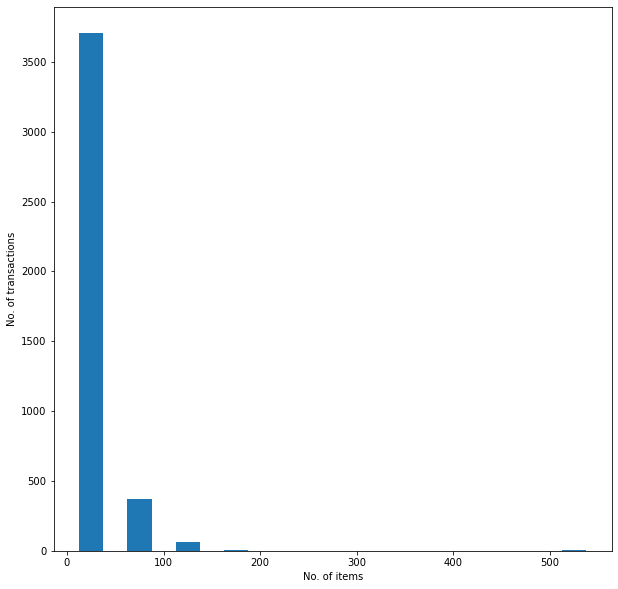

In [16]:

bins = [0,50,100,150,200,250,300,350,400,450,500,550]
fig = plt.figure(figsize = (10,10))
plt.hist(Ser, bins, histtype = 'bar', rwidth = 0.5)
plt.xlabel('No. of items')
plt.ylabel('No. of transactions')
plt.show()


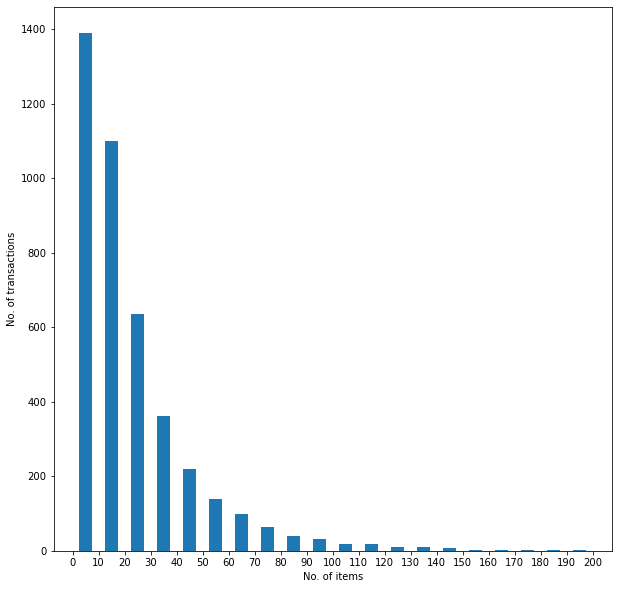

In [17]:

bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)
ax1.hist(Ser, bins, histtype = 'bar', rwidth = 0.5)
ax1.set_xticks(bins)
plt.xlabel('No. of items')
plt.ylabel('No. of transactions')
plt.show()


<BarContainer object of 10 artists>

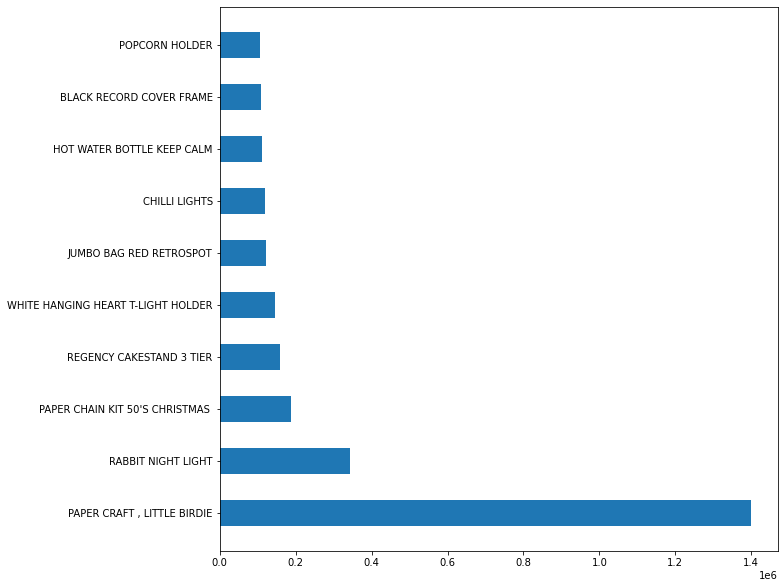

In [18]:

df['total_cost_item'] = df.NumberOfItemsPurchased*df.CostPerItem
Ser = df.groupby('ItemDescription').total_cost_item.sum()
Ser.sort_values(ascending = False, inplace = True)
Ser = Ser[:10]
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.barh(Ser.index, Ser, height = 0.5)


In [19]:
df_set = df.groupby(['TransactionId', 'ItemDescription']).NumberOfItemsPurchased.sum().unstack().reset_index().fillna(0).set_index('TransactionId')

In [20]:
def encode(x):
 if x <= 0:
  return 0
 else:
  return 1
df_set = df_set.applymap(encode)
df_set


ItemDescription,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,...,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
TransactionId,,,,,,,,,,,,,,,,,,,,,
6291263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6291274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6291285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6291296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6291307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6397413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6397424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6397435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [21]:
frequent_itemsets = apriori(df_set, min_support = 0.015, use_colnames = True)

In [44]:
len(frequent_itemsets.index)

651

In [45]:
import time
support = [0.015,0.020,0.025,0.030,0.035]
time_apriori = []
no_frequent_itemsets = []
for value in support:
    start_time = time.time()
    frequent_itemsets = apriori(df_set, min_support = value, use_colnames = True)
    no_frequent_itemsets.append(len(frequent_itemsets.index))
    elapsed_time = time.time() - start_time
    time_apriori.append(elapsed_time)
    no_frequent_itemsets.append(len(frequent_itemsets.index))
    
df_time = pd.DataFrame(list(zip( support, time_apriori , no_frequent_itemsets )),
                  columns = [ 'support' , 'time_apriori' , 'no_frequent_itemsets' ])
print(df_time)

       time_apriori  no_frequent_itemsets
0.015    533.786611                   651
0.020      3.344478                   651
0.030      0.445624                   364


In [53]:
df_time = pd.DataFrame(list(zip( support, time_apriori , no_frequent_itemsets )),
                  columns = [ 'support' , 'time_apriori' , 'no_frequent_itemsets' ])
print(df_time)

   support  time_apriori  no_frequent_itemsets
0    0.015    533.786611                   651
1    0.020      3.344478                   651
2    0.030      0.445624                   364


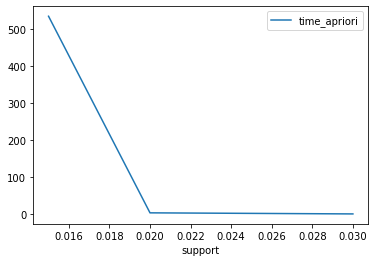

In [54]:
import matplotlib.pyplot as plt
ax = plt.gca()
  
#use plot() method on the dataframe
df_time.plot( x = 'support' , y = 'time_apriori', ax = ax )
#df_time.plot( x = 'support' , y = 'no_frequent_itemsets' , ax = ax )

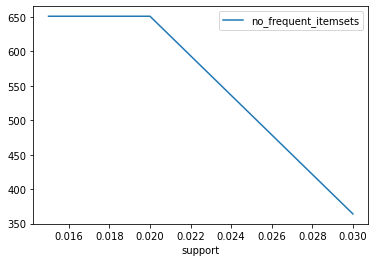

In [55]:
ax = plt.gca()
df_time.plot( x = 'support' , y = 'no_frequent_itemsets' , ax = ax )

c:\users\karti\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Text(0, 0.5, 'Support')

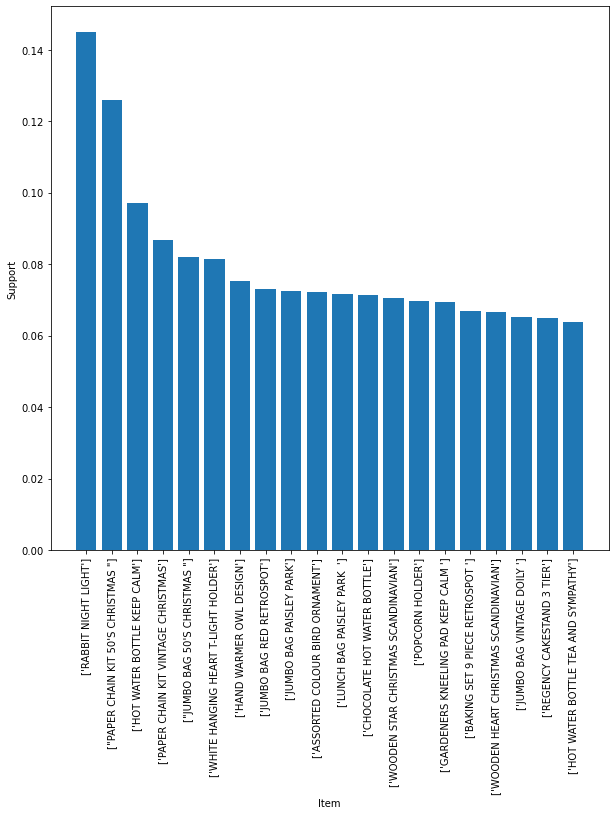

In [23]:
#frequent_itemsets = apriori(df_set, min_support = 0.015, use_colnames = True)
top_items = frequent_itemsets.sort_values('support', ascending = False)[:20]
for i in range(len(top_items.itemsets)):
    top_items.itemsets.iloc[i] = str(list(top_items.itemsets.iloc[i]))
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.bar(top_items.itemsets, top_items.support)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.xlabel('Item')
plt.ylabel('Support')

In [24]:
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.2)

In [25]:
top_rules = rules.sort_values('confidence', ascending = False)[:10]

In [26]:
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
447,"(SET OF 3 WOODEN SLEIGH DECORATIONS, SET OF 3 ...",(SET OF 3 WOODEN STOCKING DECORATION),0.017059,0.037722,0.015858,0.929577,24.642684,0.015214,13.664344
442,"(WOODEN TREE CHRISTMAS SCANDINAVIAN, WOODEN HE...",(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.029313,0.070399,0.026430,0.901639,12.807587,0.024366,9.450945
431,"(SET OF 3 WOODEN HEART DECORATIONS, SET OF 3 W...",(SET OF 3 WOODEN STOCKING DECORATION),0.023306,0.037722,0.020903,0.896907,23.776610,0.020024,9.334094
448,"(SET OF 3 WOODEN STOCKING DECORATION, SET OF 3...",(SET OF 3 WOODEN TREE DECORATIONS),0.017780,0.033878,0.015858,0.891892,26.326624,0.015255,8.936629
417,"(SET OF 3 WOODEN SLEIGH DECORATIONS, SET OF 3 ...",(SET OF 3 WOODEN STOCKING DECORATION),0.020903,0.037722,0.017780,0.850575,22.548356,0.016991,6.439859
326,(WOODEN TREE CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.040125,0.070399,0.033878,0.844311,11.993256,0.031053,5.970900
412,"(LUNCH BAG PAISLEY PARK , VINTAGE DOILY JUMBO...",(JUMBO BAG PAISLEY PARK),0.020903,0.072561,0.017540,0.839080,11.563751,0.016023,5.763369
437,"(SET OF 3 WOODEN SLEIGH DECORATIONS, SET OF 3 ...",(SET OF 3 WOODEN STOCKING DECORATION),0.023066,0.037722,0.019222,0.833333,22.091295,0.018351,5.773667
429,"(SET OF 3 WOODEN STOCKING DECORATION, SET OF 3...",(SET OF 3 WOODEN TREE DECORATIONS),0.025228,0.033878,0.020903,0.828571,24.457548,0.020049,5.635712
449,"(SET OF 3 WOODEN STOCKING DECORATION, SET OF 3...",(SET OF 3 WOODEN HEART DECORATIONS),0.019222,0.042528,0.015858,0.825000,19.399153,0.015040,5.471271


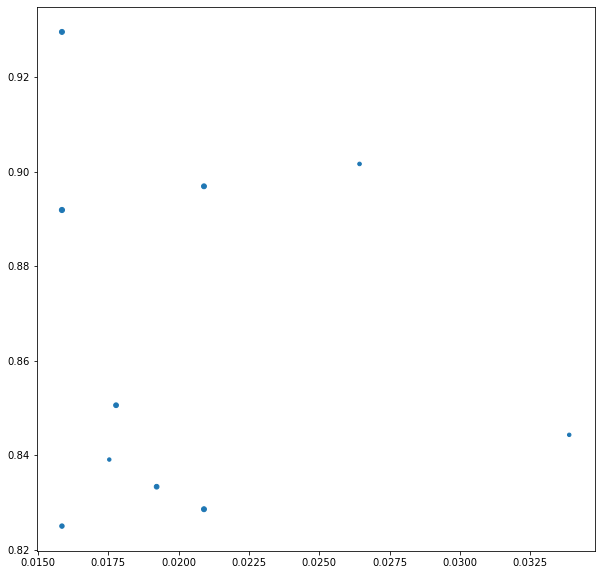

In [27]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.scatter(top_rules.support, top_rules.confidence, top_rules.lift)


{'r': Text(-0.6532168991922183, 0.6557564422098454, 'r'),
 '0': Text(-0.14166434750298293, 1.0049733026216834, '0'),
 'SET OF 3 WOODEN SLEIGH DECORATIONS': Text(0.7938149728845604, -0.4133198788707655, 'SET OF 3 WOODEN SLEIGH DECORATIONS'),
 'r0': Text(-0.528057360808438, -0.656707792273798, 'r0'),
 'SET OF 3 WOODEN HEART DECORATIONS': Text(-0.5354765022981224, 0.938319880701632, 'SET OF 3 WOODEN HEART DECORATIONS'),
 'SET OF 3 WOODEN TREE DECORATIONS': Text(0.9454385606977345, -0.2712498395398896, 'SET OF 3 WOODEN TREE DECORATIONS'),
 'SET OF 3 WOODEN STOCKING DECORATION': Text(-0.3392954404129637, 0.9427366346036223, 'SET OF 3 WOODEN STOCKING DECORATION'),
 '1': Text(0.048638271495851114, -0.8489098492763612, '1'),
 'WOODEN TREE CHRISTMAS SCANDINAVIAN': Text(-1.0, 0.03997573388194532, 'WOODEN TREE CHRISTMAS SCANDINAVIAN'),
 'r1': Text(-0.8631156269968164, -0.06730065706722066, 'r1'),
 'WOODEN HEART CHRISTMAS SCANDINAVIAN': Text(0.9450196327180161, 0.38794280519600505, 'WOODEN HEART C

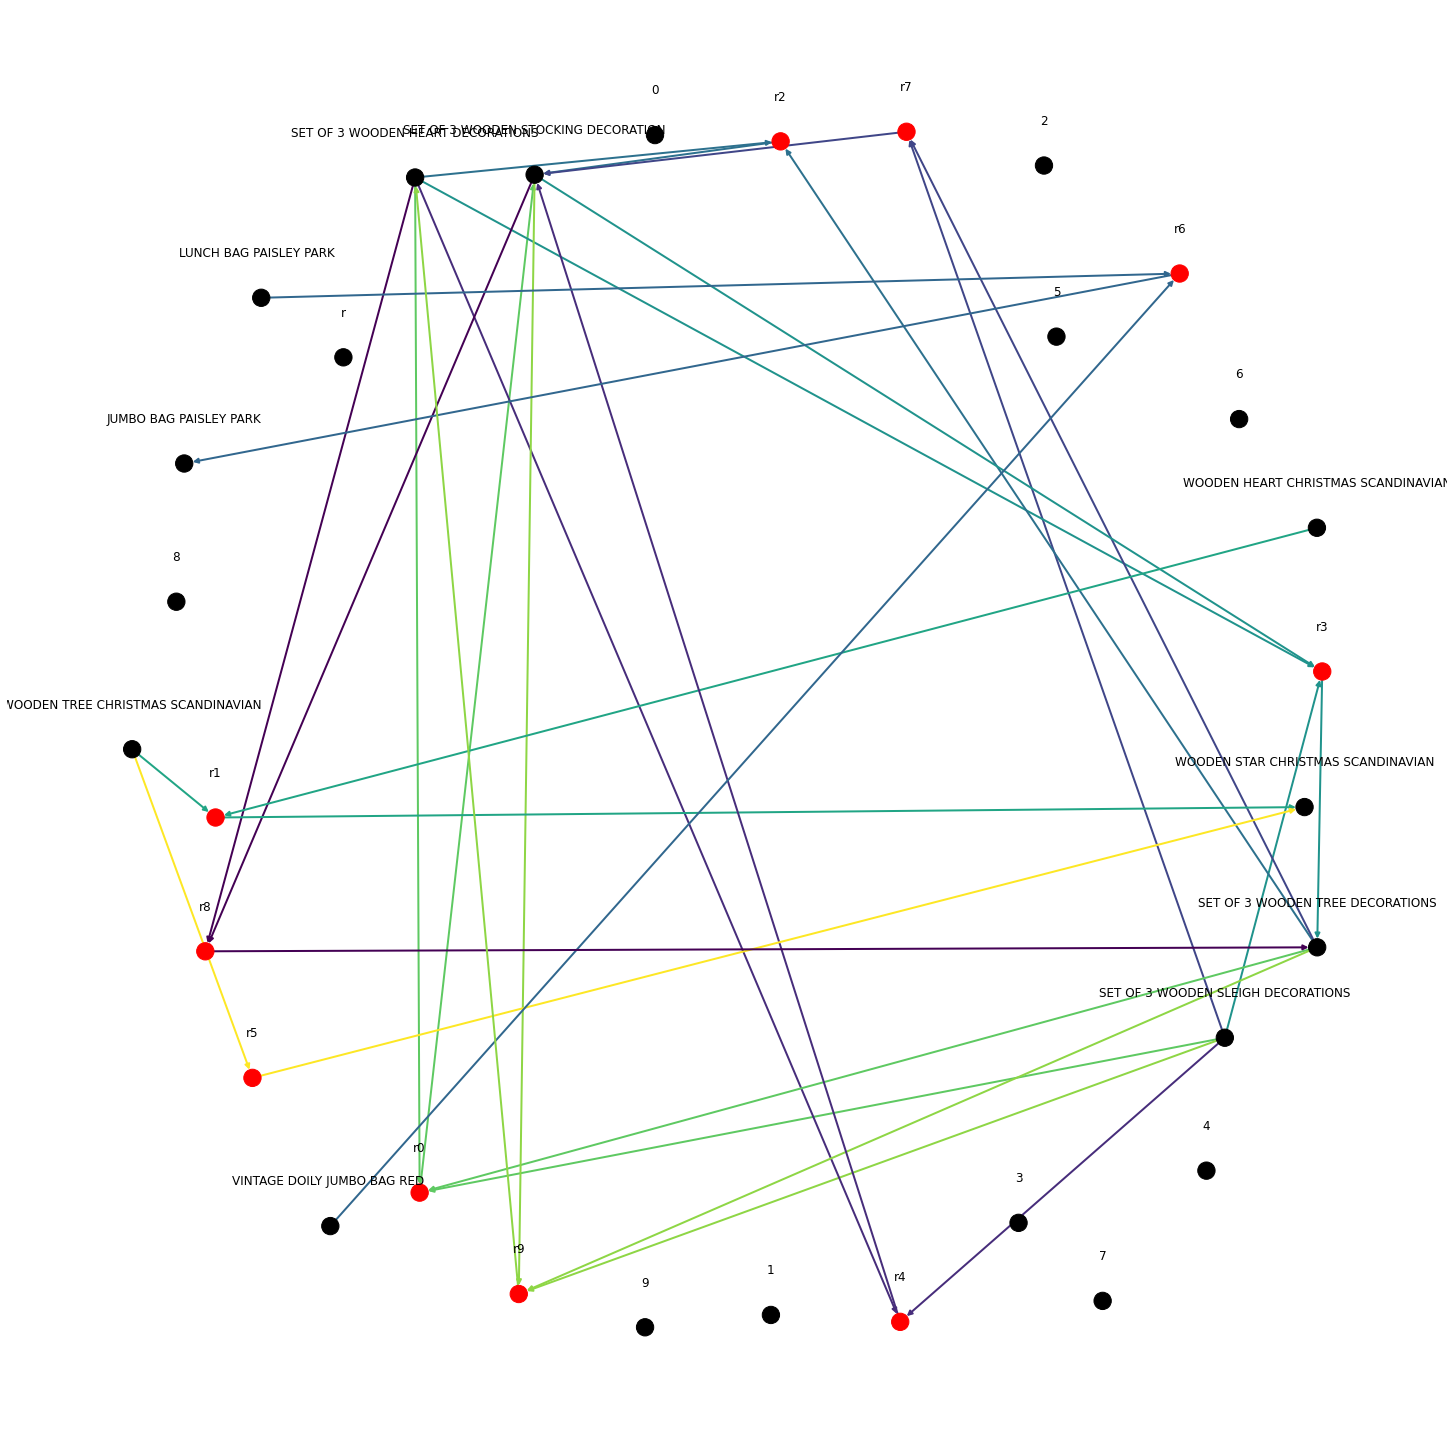

In [28]:
import networkx as nx
G1 = nx.DiGraph()
color_map = []
N = 50
colors = np.random.rand(N)
strs = ['r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9']
for i in range(10):
    G1.add_nodes_from('r'+str(i))
    for a in top_rules.iloc[i]['antecedents']:
        G1.add_nodes_from([a])
        G1.add_edge(a, 'r'+str(i), color = colors[i], weight = 2)
    for c in top_rules.iloc[i]['consequents']:
        G1.add_nodes_from([c])
        G1.add_edge('r'+str(i), c, color = colors[i], weight = 2)
for node in G1:
    found_a_string = False
    for item in strs:
        if node == item:
            found_a_string = True
    if found_a_string:
        color_map.append('red')
    else:
        color_map.append('black')
edges = G1.edges()
colors = [G1[u][v]['color'] for u,v in edges]
weights = [G1[u][v]['weight'] for u,v in edges]
pos = nx.spring_layout(G1, k = 16, scale = 1)
fig = plt.figure(figsize = (20,20))
nx.draw(G1, pos, edges = edges, node_color = color_map, edge_color = colors, width = weights, font_size = 16, with_labels = False)
for p in pos:
    pos[p][1] += 0.07
nx.draw_networkx_labels(G1, pos)

In [29]:
rules[(rules.lift >= 9.388) & (rules.confidence >= 0.429)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(3 DRAWER ANTIQUE WHITE WOOD CABINET),(WOOD 2 DRAWER CABINET WHITE FINISH),0.027391,0.029793,0.016579,0.605263,20.315365,0.015763,2.457857
1,(WOOD 2 DRAWER CABINET WHITE FINISH),(3 DRAWER ANTIQUE WHITE WOOD CABINET),0.029793,0.027391,0.016579,0.556452,20.315365,0.015763,2.192792
2,(6 GIFT TAGS 50'S CHRISTMAS ),(ROLL WRAP 50'S CHRISTMAS),0.033878,0.043008,0.016579,0.489362,11.378343,0.015122,1.874109
9,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.027631,0.052619,0.018020,0.652174,12.394282,0.016566,2.723721
11,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.052619,0.038203,0.024267,0.461187,12.072083,0.022257,1.785030
...,...,...,...,...,...,...,...,...,...
454,"(SET OF 3 WOODEN HEART DECORATIONS, SET OF 3 W...","(SET OF 3 WOODEN STOCKING DECORATION, SET OF 3...",0.023306,0.023306,0.015858,0.680412,29.194601,0.015315,3.056107
455,"(SET OF 3 WOODEN STOCKING DECORATION, SET OF 3...","(SET OF 3 WOODEN SLEIGH DECORATIONS, SET OF 3 ...",0.025228,0.023066,0.015858,0.628571,27.251190,0.015276,2.630207
456,"(SET OF 3 WOODEN STOCKING DECORATION, SET OF 3...","(SET OF 3 WOODEN SLEIGH DECORATIONS, SET OF 3 ...",0.026430,0.020903,0.015858,0.600000,28.703448,0.015305,2.447741
457,(SET OF 3 WOODEN SLEIGH DECORATIONS),"(SET OF 3 WOODEN STOCKING DECORATION, SET OF 3...",0.033878,0.020903,0.015858,0.468085,22.392761,0.015150,1.840702


In [30]:
fp_itemsets=fpgrowth(df_set, min_support=0.015,use_colnames=True)

In [31]:
fp_itemsets

,support,itemsets
0,0.019702,(ANTIQUE SILVER TEA GLASS ENGRAVED)
1,0.086737,(PAPER CHAIN KIT VINTAGE CHRISTMAS)
2,0.031956,(CHRISTMAS LIGHTS 10 REINDEER)
3,0.028592,(FELTCRAFT PRINCESS LOLA DOLL)
4,0.027631,(WORLD WAR 2 GLIDERS ASSTD DESIGNS)
...,...,...
646,0.021864,"(JUMBO BAG PAISLEY PARK, JUMBO BAG RED RETROSPOT)"
647,0.023306,"(JUMBO BAG PAISLEY PARK, JUMBO BAG 50'S CHRIST..."
648,0.017299,"(LUNCH BAG RED VINTAGE DOILY, LUNCH BAG PAISLE..."
649,0.016819,"(LUNCH BAG RED VINTAGE DOILY, LUNCH BAG VINTAG..."


In [57]:
import time
support = [0.015,0.020,0.025,0.030,0.035]
time_fpgrowth = []
no_frequent_itemsets = []
for value in support:
    start_time = time.time()
    frequent_itemsets = fpgrowth(df_set, min_support = value, use_colnames = True)
    no_frequent_itemsets.append(len(frequent_itemsets.index))
    elapsed_time = time.time() - start_time
    time_fpgrowth.append(elapsed_time)
    no_frequent_itemsets.append(len(frequent_itemsets.index))
    
df_time = pd.DataFrame(list(zip( support, time_fpgrowth , no_frequent_itemsets )),
                  columns = [ 'support' , 'time_fpgrowth' , 'no_frequent_itemsets' ])
print(df_time)

   support  time_fpgrowth  no_frequent_itemsets
0    0.015       1.358854                   651
1    0.020       1.575191                   651
2    0.030       1.138796                   364


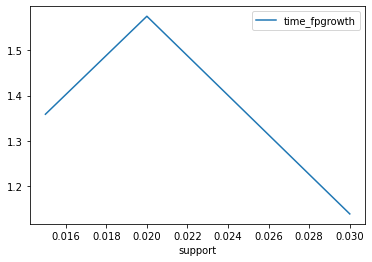

In [59]:
ax = plt.gca()
  
#use plot() method on the dataframe
df_time.plot( x = 'support' , y = 'time_fpgrowth', ax = ax )
#df_time.plot( x = 'support' , y = 'no_frequent_itemsets' , ax = ax )

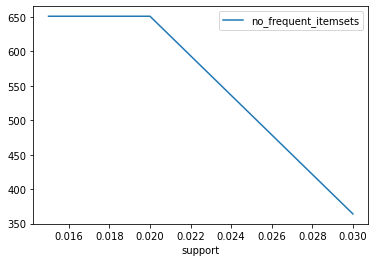

In [60]:
ax = plt.gca()
df_time.plot( x = 'support' , y = 'no_frequent_itemsets' , ax = ax )

c:\users\karti\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Text(0, 0.5, 'Support')

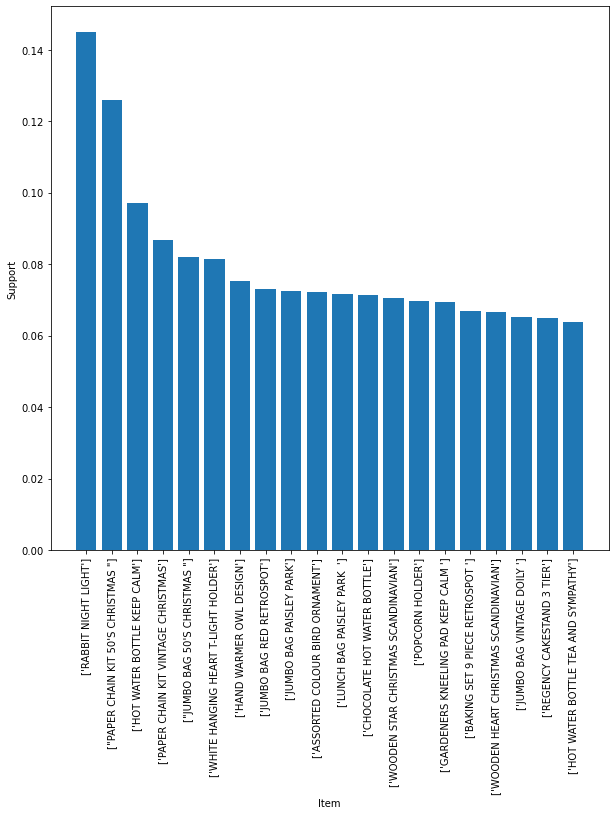

In [32]:
top_items = fp_itemsets.sort_values('support', ascending = False)[:20]
for i in range(len(top_items.itemsets)):
    top_items.itemsets.iloc[i] = str(list(top_items.itemsets.iloc[i]))
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.bar(top_items.itemsets, top_items.support)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.xlabel('Item')
plt.ylabel('Support')

In [33]:
rules1 = association_rules(fp_itemsets, metric = 'confidence', min_threshold = 0.2)

In [34]:
top_rules1 = rules1.sort_values('confidence', ascending = False)[:10]

In [35]:
top_rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
362,"(SET OF 3 WOODEN SLEIGH DECORATIONS, SET OF 3 ...",(SET OF 3 WOODEN STOCKING DECORATION),0.017059,0.037722,0.015858,0.929577,24.642684,0.015214,13.664344
115,"(WOODEN TREE CHRISTMAS SCANDINAVIAN, WOODEN HE...",(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.029313,0.070399,0.026430,0.901639,12.807587,0.024366,9.450945
346,"(SET OF 3 WOODEN HEART DECORATIONS, SET OF 3 W...",(SET OF 3 WOODEN STOCKING DECORATION),0.023306,0.037722,0.020903,0.896907,23.776610,0.020024,9.334094
363,"(SET OF 3 WOODEN STOCKING DECORATION, SET OF 3...",(SET OF 3 WOODEN TREE DECORATIONS),0.017780,0.033878,0.015858,0.891892,26.326624,0.015255,8.936629
415,"(SET OF 3 WOODEN SLEIGH DECORATIONS, SET OF 3 ...",(SET OF 3 WOODEN STOCKING DECORATION),0.020903,0.037722,0.017780,0.850575,22.548356,0.016991,6.439859
110,(WOODEN TREE CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.040125,0.070399,0.033878,0.844311,11.993256,0.031053,5.970900
442,"(LUNCH BAG PAISLEY PARK , VINTAGE DOILY JUMBO...",(JUMBO BAG PAISLEY PARK),0.020903,0.072561,0.017540,0.839080,11.563751,0.016023,5.763369
352,"(SET OF 3 WOODEN SLEIGH DECORATIONS, SET OF 3 ...",(SET OF 3 WOODEN STOCKING DECORATION),0.023066,0.037722,0.019222,0.833333,22.091295,0.018351,5.773667
344,"(SET OF 3 WOODEN STOCKING DECORATION, SET OF 3...",(SET OF 3 WOODEN TREE DECORATIONS),0.025228,0.033878,0.020903,0.828571,24.457548,0.020049,5.635712
364,"(SET OF 3 WOODEN STOCKING DECORATION, SET OF 3...",(SET OF 3 WOODEN HEART DECORATIONS),0.019222,0.042528,0.015858,0.825000,19.399153,0.015040,5.471271


{'r': Text(0.6482511694053054, 0.7646833734745337, 'r'),
 '0': Text(0.8221459853007761, 0.45594432723608846, '0'),
 'SET OF 3 WOODEN SLEIGH DECORATIONS': Text(-0.45791859799560597, -0.8018240822178677, 'SET OF 3 WOODEN SLEIGH DECORATIONS'),
 'r0': Text(-0.6706303042981179, -0.7513169212981265, 'r0'),
 'SET OF 3 WOODEN HEART DECORATIONS': Text(-1.0, -0.0015244036890480206, 'SET OF 3 WOODEN HEART DECORATIONS'),
 'SET OF 3 WOODEN TREE DECORATIONS': Text(0.6462275895552883, -0.6648475773791451, 'SET OF 3 WOODEN TREE DECORATIONS'),
 'SET OF 3 WOODEN STOCKING DECORATION': Text(-0.3698529290237351, 1.0251309036348186, 'SET OF 3 WOODEN STOCKING DECORATION'),
 '1': Text(-0.9177210679797575, 0.4657884960119836, '1'),
 'WOODEN TREE CHRISTMAS SCANDINAVIAN': Text(-0.2516378028212817, -0.8711172174974162, 'WOODEN TREE CHRISTMAS SCANDINAVIAN'),
 'r1': Text(0.32727696717584925, 0.8150432904640241, 'r1'),
 'WOODEN HEART CHRISTMAS SCANDINAVIAN': Text(-0.22634034127163438, 0.8783338214686378, 'WOODEN HEA

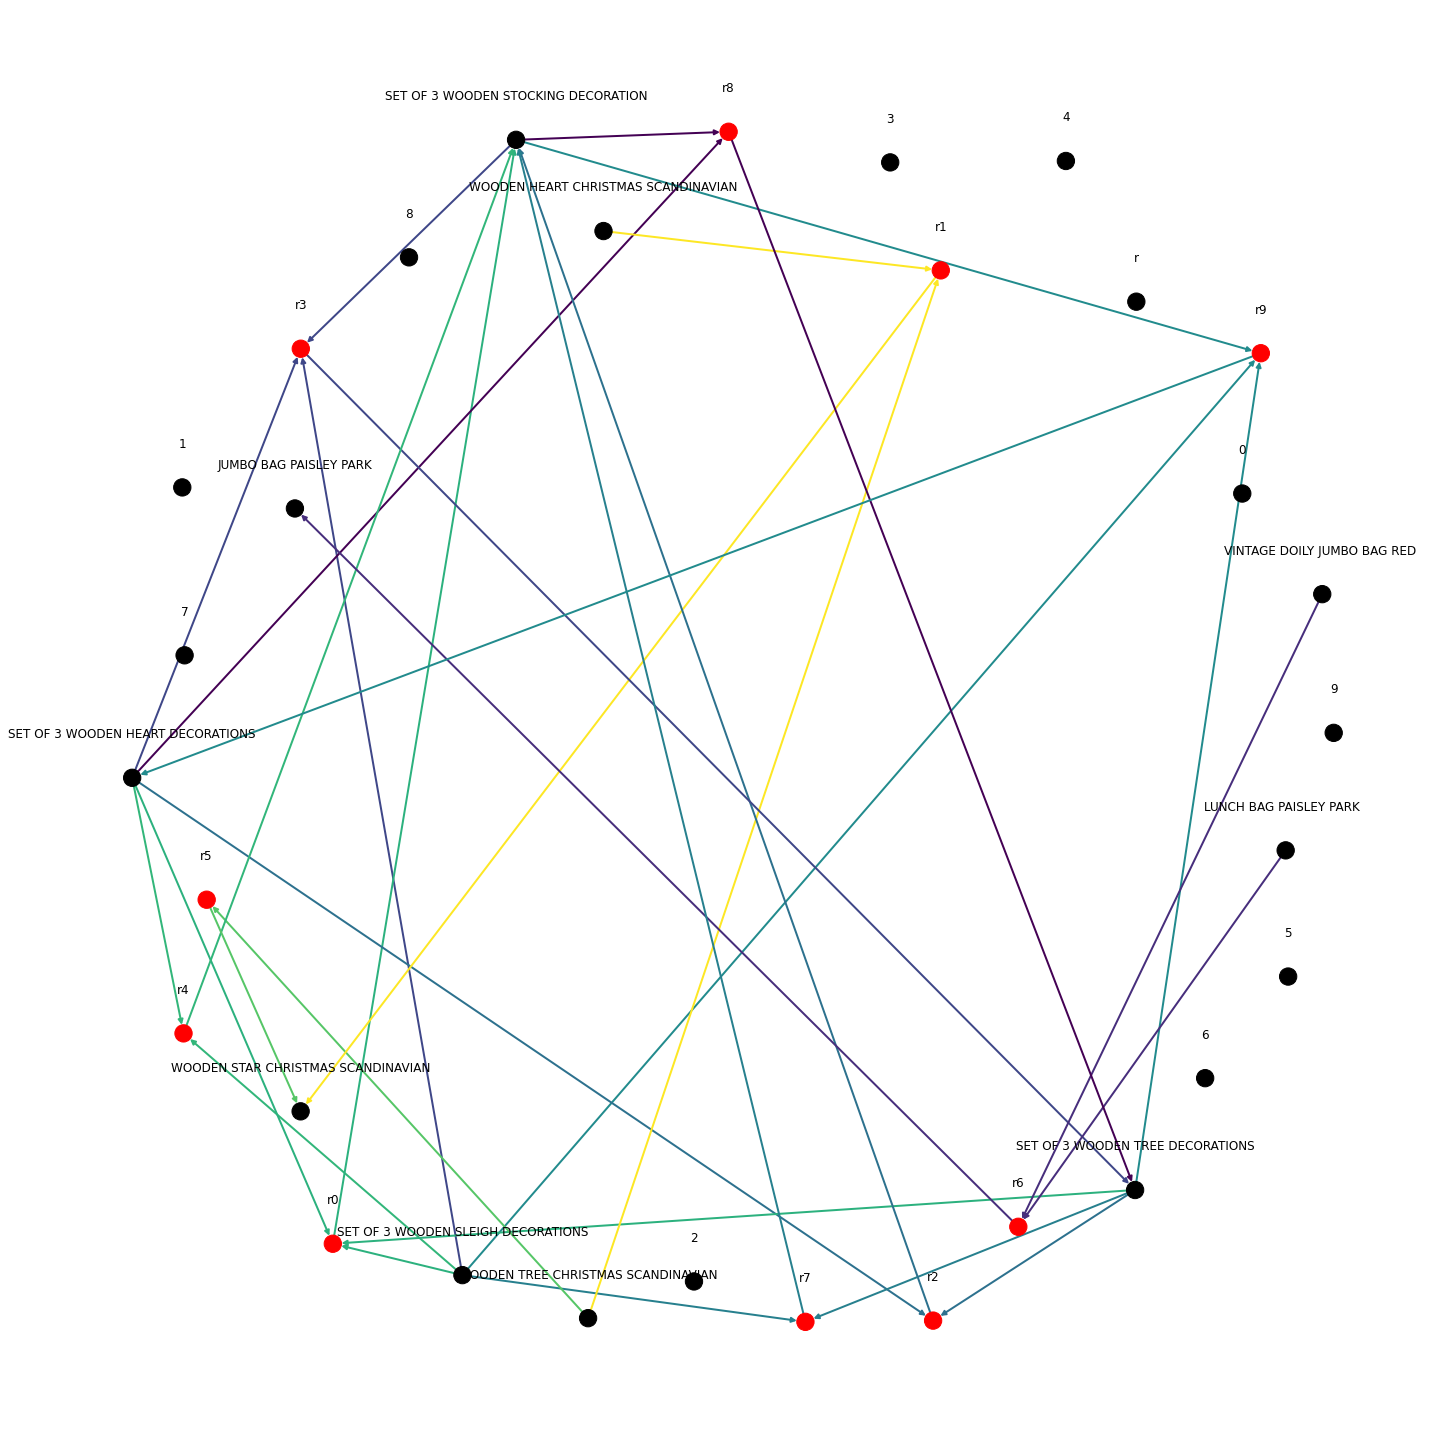

In [36]:
import networkx as nx
G1 = nx.DiGraph()
color_map = []
N = 50
colors = np.random.rand(N)
strs = ['r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9']
for i in range(10):
    G1.add_nodes_from('r'+str(i))
    for a in top_rules1.iloc[i]['antecedents']:
        G1.add_nodes_from([a])
        G1.add_edge(a, 'r'+str(i), color = colors[i], weight = 2)
    for c in top_rules1.iloc[i]['consequents']:
        G1.add_nodes_from([c])
        G1.add_edge('r'+str(i), c, color = colors[i], weight = 2)
for node in G1:
    found_a_string = False
    for item in strs:
        if node == item:
            found_a_string = True
    if found_a_string:
        color_map.append('red')
    else:
        color_map.append('black')
edges = G1.edges()
colors = [G1[u][v]['color'] for u,v in edges]
weights = [G1[u][v]['weight'] for u,v in edges]
pos = nx.spring_layout(G1, k = 16, scale = 1)
fig = plt.figure(figsize = (20,20))
nx.draw(G1, pos, edges = edges, node_color = color_map, edge_color = colors, width = weights, font_size = 16, with_labels = False)
for p in pos:
    pos[p][1] += 0.07
nx.draw_networkx_labels(G1, pos)

In [37]:
rules[(rules.lift >= 9.388) & (rules.confidence >= 0.429)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(3 DRAWER ANTIQUE WHITE WOOD CABINET),(WOOD 2 DRAWER CABINET WHITE FINISH),0.027391,0.029793,0.016579,0.605263,20.315365,0.015763,2.457857
1,(WOOD 2 DRAWER CABINET WHITE FINISH),(3 DRAWER ANTIQUE WHITE WOOD CABINET),0.029793,0.027391,0.016579,0.556452,20.315365,0.015763,2.192792
2,(6 GIFT TAGS 50'S CHRISTMAS ),(ROLL WRAP 50'S CHRISTMAS),0.033878,0.043008,0.016579,0.489362,11.378343,0.015122,1.874109
9,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.027631,0.052619,0.018020,0.652174,12.394282,0.016566,2.723721
11,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.052619,0.038203,0.024267,0.461187,12.072083,0.022257,1.785030
...,...,...,...,...,...,...,...,...,...
454,"(SET OF 3 WOODEN HEART DECORATIONS, SET OF 3 W...","(SET OF 3 WOODEN STOCKING DECORATION, SET OF 3...",0.023306,0.023306,0.015858,0.680412,29.194601,0.015315,3.056107
455,"(SET OF 3 WOODEN STOCKING DECORATION, SET OF 3...","(SET OF 3 WOODEN SLEIGH DECORATIONS, SET OF 3 ...",0.025228,0.023066,0.015858,0.628571,27.251190,0.015276,2.630207
456,"(SET OF 3 WOODEN STOCKING DECORATION, SET OF 3...","(SET OF 3 WOODEN SLEIGH DECORATIONS, SET OF 3 ...",0.026430,0.020903,0.015858,0.600000,28.703448,0.015305,2.447741
457,(SET OF 3 WOODEN SLEIGH DECORATIONS),"(SET OF 3 WOODEN STOCKING DECORATION, SET OF 3...",0.033878,0.020903,0.015858,0.468085,22.392761,0.015150,1.840702


   support  time_fpgrowth  time_apriori
0    0.015       1.358854    533.786611
1    0.020       1.575191      3.344478
2    0.030       1.138796      0.445624


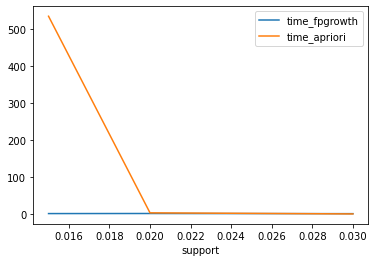

In [62]:
df_diff = pd.DataFrame(list(zip( support, time_fpgrowth , time_apriori )),
                  columns = [ 'support' , 'time_fpgrowth' , 'time_apriori' ])

print(df_diff)
ax = plt.gca()
  
#use plot() method on the dataframe
df_diff.plot( x = 'support' , y = 'time_fpgrowth', ax = ax )
df_diff.plot( x = 'support' , y = 'time_apriori' , ax = ax )